In [1]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>«Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»</b></h3>


In [3]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t") # Подгрузим данные
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [7]:
# изменим формат  данных, подходящего для пакета statsmodels
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
 
df_melt.columns = ['index', 'treatments', 'value'] # заменяем имена столбцов
print(df_melt)

    index treatments  value
0       0          A     25
1       1          A     30
2       2          A     28
3       3          A     36
4       4          A     29
5       0          B     45
6       1          B     55
7       2          B     29
8       3          B     56
9       4          B     40
10      0          C     30
11      1          C     29
12      2          C     33
13      3          C     37
14      4          C     27
15      0          D     54
16      1          D     60
17      2          D     51
18      3          D     62
19      4          D     73


In [6]:
#Проверка теста из коробки на вычисления
print(df[['A','C']])
print()

#Вычислим по формуле
t  = (df['A'].mean() - df['C'].mean())/(df['A'].std()**2/df['A'].count()+df['C'].std()**2/df['C'].count())**0.5
t

    A   C
0  25  30
1  30  29
2  28  33
3  36  37
4  29  27



-0.6374552583116758

**Получаем коробчатую диаграмму, чтобы увидеть распределение данных по группам.** 

**Используя коробчатую диаграмму, мы можем легко обнаружить различия между разными методами лечения**

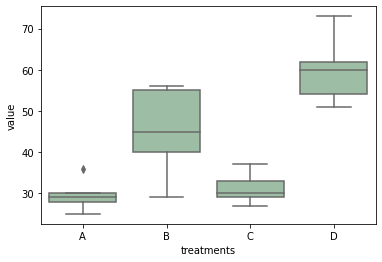

In [19]:
import seaborn as sns  # Еще дна библиотека для визуализации данных, но более продвинутая
#sns.set(rc={'figure.figsize':(10, 5)})  # можно менять ширину и высоту при желании

sns.color_palette("rocket", as_cmap=True)
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2') #можно еще  palette='plasma'

#ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [4]:
import scipy.stats as stats
# Функция f_oneway принимает группы в качестве входных данных и возвращает значения F и P
fvalue, pvalue = stats.f_oneway(df['A'],  df['B'], df['C'], df['D'])

print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.639241146210922e-05


In [20]:
fvalue, pvalue = stats.f_oneway(df['A'], df['C'])
fvalue, pvalue

(0.40634920634920635, 0.5416380250488471)

### Начнем с датасета про морских гребешков

In [21]:
abalone = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/abalone.csv'
data = pd.read_csv(abalone, error_bad_lines=False)
data.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [10]:
half = len(data['Length']) // 2 

sam1 = data.loc[half:, 'Length'] # Берем первую половину данных
sam2 = data.loc[:half, 'Length'] # Берем вторую половину данных

stats.ttest_ind(sam2, sam1) # применяем тест Стьюдента. 

Ttest_indResult(statistic=-1.5812897200356624, pvalue=0.11388753958977987)

In [12]:
df['A']

0    25
1    30
2    28
3    36
4    29
Name: A, dtype: int64

# Дисперсионный анализ и датасет про раковины

<div class="alert alert-info">
Вот некоторые данные об измерении раковины (длина рубца передней приводящей мышцы, стандартизированная путем деления на длину) у мидии Mytilus trossulus из пяти мест: 
Тилламук, Орегон; Ньюпорт, Орегон; Петербург, Аляска; Магадан, Россия и Tvarminne, Финляндия.
</div>

In [41]:
from scipy.stats import f_oneway # импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

# Берем несколько выборок с размерами раковин разных видов
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

F, p = f_oneway(tillamook, newport, petersburg, magadan, tvarminne)  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

7.121019471642447 0.0002812242314534544
Разное распределение (отклоняем H0)


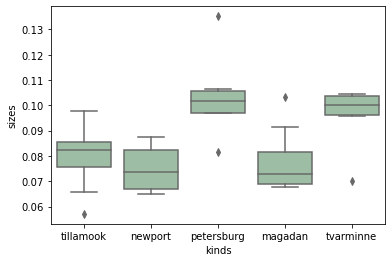

In [56]:
import seaborn as sns  # Еще дна библиотека для визуализации данных, но более продвинутая
 
#Немного преобразуем данные, не важно как
sizes = tillamook + newport +petersburg + magadan + tvarminne
kinds = ['tillamook']*len(tillamook) + ['newport']*len(newport)+['petersburg']*len(petersburg)+['magadan']*len(magadan) + ['tvarminne']*len(tvarminne)
df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['kinds'] = kinds


ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')
#ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()

In [57]:
 df_mid

,sizes,kinds
0,0.0571,tillamook
1,0.0813,tillamook
2,0.0831,tillamook
3,0.0976,tillamook
4,0.0817,tillamook
5,0.0859,tillamook
6,0.0735,tillamook
7,0.0659,tillamook
8,0.0923,tillamook
9,0.0836,tillamook


**Можете привести пример когда выборки зависимы, а когда нет ?**

# Критерием Манна-Уитни

In [17]:
# Тест Вилкоксона для независимых выборок также называется критерием Манна-Уитни

from scipy.stats import mannwhitneyu # Импортируем нужный тест из пакета scipy
 
# Генерируем две независимых выборки
group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]*5  # Некий общий элемент
group_1 = group*5
group_2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]*5

# Сравнение групп
stat, p = mannwhitneyu(group_1, group_2) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=6250.000, p=0.000
Разные распределения (отвергаем H0)


21.0 22.75


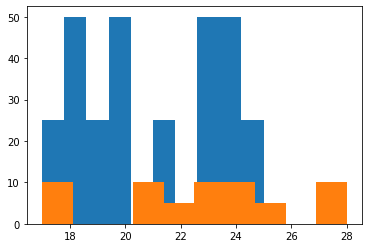

In [19]:
print(np.mean(group_1), np.mean(group_2))

plt.hist(group_1)
plt.hist(group_2);

2021-05-15 19:52:21,083 [9408] WARNING  py.warnings:109: [JupyterRequire] C:\Users\sasha\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)



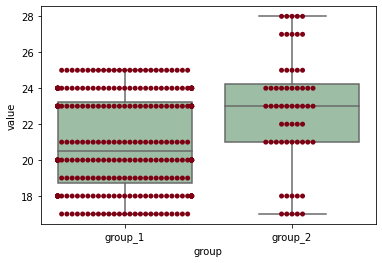

In [15]:
data_group = pd.DataFrame()
data_group['value'] = group_1 + group_2 
data_group['group'] = ['group_1']*len(group_1)+['group_2']*len(group_2)

ax = sns.boxplot(x='group', y='value', data=data_group, color='#99c2a2')
ax = sns.swarmplot(x="group", y="value", data=data_group, color='#7d0013')
plt.show()
# pd.DataFrame(group_2).hist()



**Какие выборки зависимы? Приведите пример**

# Критерий Уилкоксона  

In [10]:
from scipy.stats import wilcoxon  # Wilcoxon signed-rank test
 

group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]  # Некий общий элемент
group_1 = group + group 

group_2 = group + [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

group_3 = group + [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 18] # отличие только в одном элементе

import scipy.stats as stats

#Выполняем the Wilcoxon-Signed Rank Test
 

#stat, p = wilcoxon(group_1, group_2)
stat, p = wilcoxon(group_1, group_3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=0.000, p=0.317
Одинаковые распределения (не отвергаем H0)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2958: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2972: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


(array([5., 1., 2., 3., 1., 4., 4., 2., 0., 2.]),
 array([17. , 18.1, 19.2, 20.3, 21.4, 22.5, 23.6, 24.7, 25.8, 26.9, 28. ]),
 <a list of 10 Patch objects>)

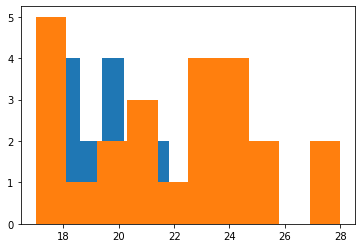

In [24]:
plt.hist(group_1)
plt.hist(group_2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


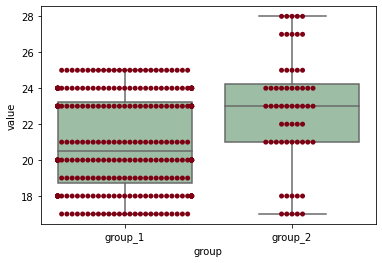

In [266]:
data_group = pd.DataFrame()
data_group['value'] = group_1 + group_2 
data_group['group'] = ['group_1']*len(group_1)+['group_2']*len(group_2)

ax = sns.boxplot(x='group', y='value', data=data_group, color='#99c2a2')
ax = sns.swarmplot(x="group", y="value", data=data_group, color='#7d0013')
plt.show()
# pd.DataFrame(group_2).hist()


# Задания для самостоятельного решения

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [38]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

stat, p = mannwhitneyu(A, B) # U-тест Манна-Уитни, поскольку выборки независимы
print('Statistics = %.2f, p = %.3f' % (stat, p))
alpha = 0.05
if p> alpha:
    print('P превышает уровень значимости, а значит выборки идентичны и различий в действиях препаратов нет')
else:
    print('P  не превышает уровень значимости, а значит различия в эффекте есть')

Statistics = 4343.00, p = 0.054
P превышает уровень значимости, а значит выборки идентичны и различий в действиях препаратов нет


<function matplotlib.pyplot.show(*args, **kw)>

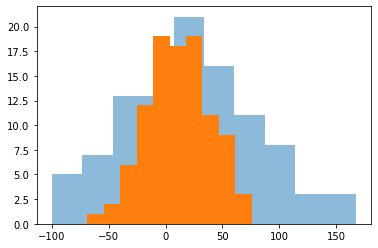

In [43]:
plt.hist(B, alpha=0.5)
plt.hist(A)
plt.show 

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [53]:
np.random.seed(11)
A_s = stats.norm.rvs(scale=30, loc=11, size=100)
B_s = A_s + stats.norm.rvs(scale=54, loc=11, size=100)

stat, p = wilcoxon(A_s, B_s) # Используем Уилкоксона,поскольку выборки зависимы
print('Statistics = %.2f, p = %.3f' % (stat, p))
alpha = 0.05

if p> alpha:
    print('P превышает уровень значимости, а значит выборки идентичны и различий в действиях препаратов нет')
else:
    print('P меньше уровня значимости, а значит различия в эффекте есть')

Statistics = 1930.00, p = 0.041
P меньше уровня значимости, а значит различия в эффекте есть


<function matplotlib.pyplot.show(*args, **kw)>

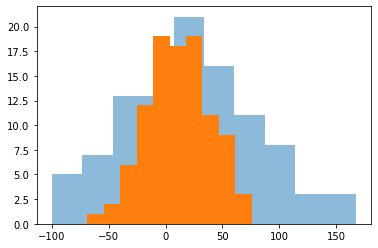

In [49]:
plt.hist(B_s, alpha=0.5)
plt.hist(A_s)
plt.show 

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [260]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Ваш код.


F, p = f_oneway(nutri, mineral)  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

18.128724672228838 0.0001213673340124552
Разное распределение (отклоняем H0)


In [264]:
sizes = nutri + mineral
kinds = ['nutri']*len(nutri) + ['mineral']*len(mineral)
diffs_mid = pd.DataFrame()
diffs_mid['sizes'] = sizes
diffs_mid['kinds'] = kinds


# ax = sns.boxplot(x='kinds', y='sizes', data=diffs_mid, color='#99c2a2')
ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()

NameError: name 'df_mid' is not defined

Ну, вроде как, вода с удобрениями несколько эффективнее чем просто минералка....

<function matplotlib.pyplot.show(*args, **kw)>

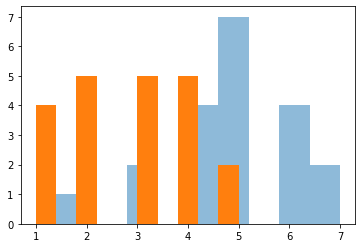

In [61]:
plt.hist(nutri, alpha=0.5)
plt.hist(mineral)
plt.show 

# Cookie Cats (Обязательно)

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [3]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [173]:
#Сгрупируем результаты теста по версиям игры.
data_by_gate = data.groupby('version').count().reset_index()

data_by_gate

,version,userid,sum_gamerounds,retention_1,retention_7
0,gate_30,44700,44700,44700,44700
1,gate_40,45489,45489,45489,45489


In [5]:
data.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

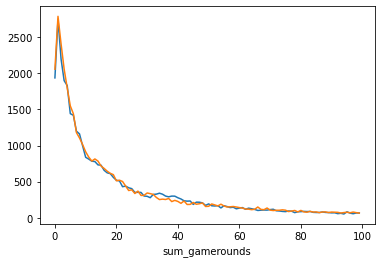

In [13]:
data_30 = data.loc[data['version'] == 'gate_30'].reset_index(drop=True)
data_40 = data.loc[data['version'] == 'gate_40'].reset_index(drop=True)
data_30_grouped = data_30.groupby('sum_gamerounds')['userid'].count()
data_40_grouped = data_40.groupby('sum_gamerounds')['userid'].count()
data_30_grouped.head(100).plot(x='sum_gamerounds', y='userid')
data_40_grouped.head(100).plot(x='sum_gamerounds', y='userid')


In [55]:
stat, p = mannwhitneyu(data_30['sum_gamerounds'], data_40['sum_gamerounds'])
stat, p


(1009027049.5, 0.025104403860221253)

In [22]:
stat, p = mannwhitneyu(data_30_grouped, data_40_grouped)
stat, p

(303790.5, 0.298756620297045)

In [34]:
# plt.hist(data_30)
print(data_30['retention_1'].mean())
data_30['retention_7'].mean()
# data_40.mean()

0.4481879194630872


0.19020134228187918

In [76]:
retention_7 = data.query('retention_7==True').reset_index()
retention_1 = data.query('retention_1==True').reset_index()
stat, p = mannwhitneyu(retention_1['sum_gamerounds'], retention_7['sum_gamerounds'])
stat, p

(221233908.0, 0.0)

In [52]:
from scipy.stats import f_oneway # импортируeм функцию для дисперсионного анализа из библиотеки scipy пакета stats

F, p = f_oneway(retention_7['sum_gamerounds'], retention_1['sum_gamerounds'])  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(round(F, 3), p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

898.659 6.470455029338579e-196
Разное распределение (отклоняем H0)


**Сам бы долго думал....**

<function matplotlib.pyplot.show(*args, **kw)>

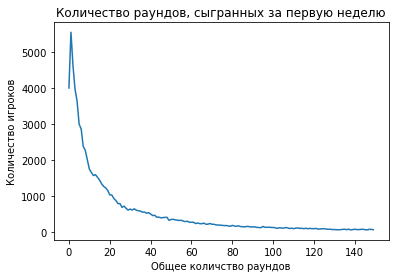

In [56]:
data_1 = data.groupby('sum_gamerounds')['userid'].count()
ax = data_1.head(150).plot(x='sum_gamerounds', y='userid')# методом нучного тыка установлено, что чем выше размер выборки, тем круче получается кривая
ax.set_xlabel("Общее количство раундов")
ax.set_ylabel("Количество игроков")
ax.set_title("Количество раундов, сыгранных за первую неделю")
plt.show

In [10]:
#Ваши выводы

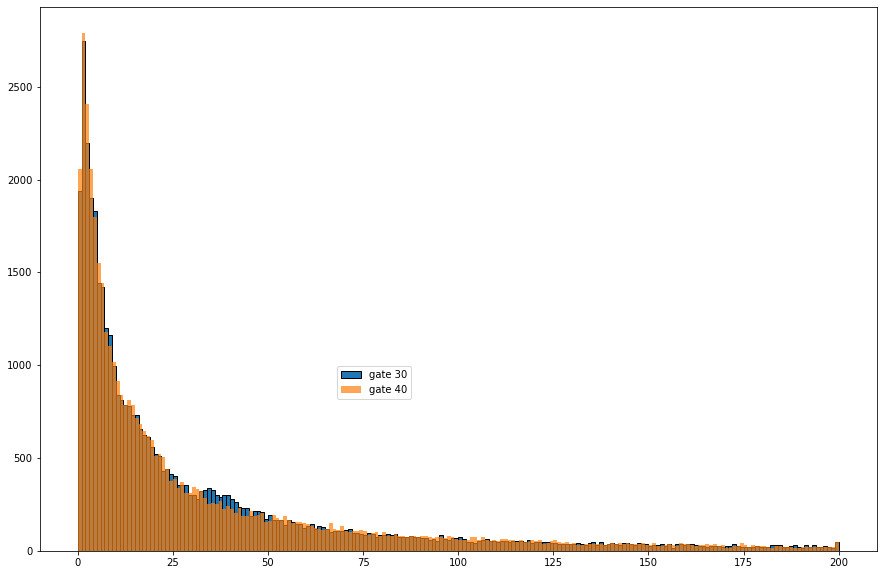

In [11]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

**Ваши выводы**

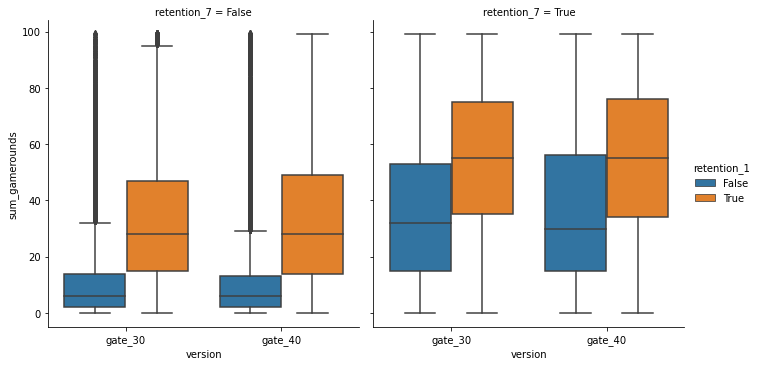

In [12]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

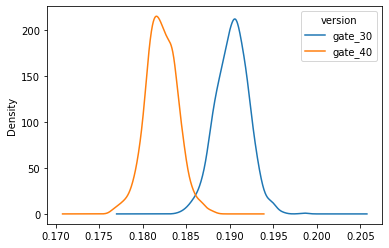

In [13]:
# #Если вдруг оказалось сложно, то вот еще ододин способ визуализации различий
# # Creating an list with bootstrapped means for each AB-group
# plt.figure(figsize=(15, 10))

# boot_1d = []
# for i in range(1000):
#     boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
#     boot_1d.append(boot_mean)
    
# # Преобразование списка в DataFrame
# boot_1d = pd.DataFrame(boot_1d)
    
# # A Kernel Density Estimate plot of the bootstrap distributions
# boot_1d.plot(kind='density')

In [257]:

from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Ваш код. 
f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1009027049.500, p=0.025


#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [57]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

F, p = f_oneway(retention_7['sum_gamerounds'], retention_1['sum_gamerounds'])  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(round(F, 3), p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)') #Ваш код. 
 

898.659 6.470455029338579e-196
Разное распределение (отклоняем H0)


Самым главным здесь, на мой взгляд, является следующее: 

In [366]:
print('средний процент возврата через 7 дней при установке ворот на 30 уровне: ', round(data.groupby('version')['retention_1'].mean()[0]*100, 2), '%')
print('средний процент возврата через 7 дней при установке ворот на 40 уровне: ', round(data.groupby('version')['retention_1'].mean()[1]*100, 2), '%')
print('средний процент возврата через 7 дней при установке ворот на 30 уровне: ', round(data.groupby('version')['retention_7'].mean()[0]*100, 2), '%')
print('средний процент возврата через 7 дней при установке ворот на 40 уровне: ', round(data.groupby('version')['retention_7'].mean()[1]*100, 2), '%')

средний процент возврата через 7 дней при установке ворот на 30 уровне:  44.82 %
средний процент возврата через 7 дней при установке ворот на 40 уровне:  44.23 %
средний процент возврата через 7 дней при установке ворот на 30 уровне:  19.02 %
средний процент возврата через 7 дней при установке ворот на 40 уровне:  18.2 %


Вероятность невозврата через 1 день:  68.6%
Вероятность невозврата через 7 дней:  82.8%


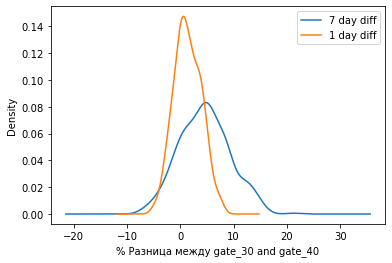

In [383]:
boot_1d = []
boot_7d = []
for i in range(500):
    boot_mean = data.sample(frac=0.1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

for i in range(500):
    boot_mean = data.sample(frac=0.1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

boot_1d = pd.DataFrame(boot_1d)
boot_1d['1 day diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100)

boot_7d = pd.DataFrame(boot_7d)
boot_7d['7 day diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100)


ax = boot_7d['7 day diff'].plot.kde(legend=True)
ax = boot_1d['1 day diff'].plot.kde(legend=True)

ax.set_xlabel("% Разница между gate_30 and gate_40")

    


prob_1 = (boot_1d['1 day diff'] > 0).mean()
prob_7 = (boot_7d['7 day diff'] > 0).mean()
# вероятности

print('Вероятность невозврата через 1 день: ', ('{:.1%}').format(prob_1))   #  70.4%

print('Вероятность невозврата через 7 дней: ', ('{:.1%}').format(prob_7))      #  84.4%

**Ваши выводы?** 

**Эммм...**
<p style="align: center;"><img align=left src="https://cs.pikabu.ru/post_img/2013/09/29/10/1380468378_1778878472.gif"></p>

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [59]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


**Применим дисперсионный анализ**

In [147]:
# Создаем DF grass в который включаем grass по двум классам (колонкам) и убирам класс Rock если вдруг он попался в пересечениях 
grass = pokemon.loc[(pokemon['Class 1'] == 'Grass') | (pokemon['Class 2'] == 'Grass')].loc[pokemon['Class 1'] != 'Rock']

# Создаем DF rock в который включаем Rock по двум классам (колонкам) и убирам класс Grass если вдруг он попался в пересечениях 
rock = pokemon.loc[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')].loc[pokemon['Class 2'] != 'Grass']

F, p = f_oneway(grass['Attack'], rock['Attack']) # дисперсионный анализ

# решил посчитать соотношение классов по силе, но взял не среднее или медиану, а среднеарифметическое от сумм этих значений.
relation = round(((rock['Attack'].mean() + rock['Attack'].median())/2) / ((grass['Attack'].mean() + grass['Attack'].median())/2), 2)  
alpha = 0.05  # Уровень значимости

print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Силы атак схожи (профессор неправ)')
else:
    print('Силы атак разные')
    print('Соотношение средних значений сил атак между классами составляет:', relation)


13.908853861099336 0.00027333381459902556
Силы атак разные
Соотношение средних значений сил атак между классами составляет: 1.28


**Вывод**

Несмотря на то,что силы атак действительно различаются, профессор неправ, поскольку в среднем, наоборот, покемоны класса "Rock" почти в 1,3 раза сильнее покемонов класса "Grass"  

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

**Повторяем алгоритм из предыдущего задания**

In [149]:
# Создаем DF grass в который включаем grass по двум классам (колонкам) и убирам класс Rock если вдруг он попался в пересечениях 
water = pokemon.loc[(pokemon['Class 1'] == 'Water') | (pokemon['Class 2'] == 'Water')].loc[pokemon['Class 1'] != 'Normal']

# Создаем DF rock в который включаем Rock по двум классам (колонкам) и убирам класс Grass если вдруг он попался в пересечениях 
normal = pokemon.loc[(pokemon['Class 1'] == 'Normal') | (pokemon['Class 2'] == 'Normal')].loc[pokemon['Class 2'] != 'Water']

F, p = f_oneway(water['Speed'], normal['Speed']) # дисперсионный анализ

# решил посчитать соотношение классов по силе, но взял не среднее или медиану, а среднеарифметическое от сумм этих значений.
relation = round(((normal['Speed'].mean() + normal['Speed'].median())/2) / ((water['Speed'].mean() + water['Speed'].median())/2), 2)  
alpha = 0.05  # Уровень значимости

print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Силы атак схожи (профессор неправ)')
else:
    print('Силы атак разные')
    print('Соотношение средних значений сил атак между классами составляет:', relation)

4.6264281532023315 0.03255353551390953
Силы атак разные
Соотношение средних значений сил атак между классами составляет: 1.11


**Вывод**

Несмотря на то,что скорости действительно различаются, профессор опять неправ, поскольку в среднем, наоборот, покемоны класса "Normal" на 11% быстрее покемонов класса "Water"  

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

**Итак.**

**Нулевая гипотеза**: покемоны одинаковы по скорости, а значит сыворотка не работает.
<br>**Альтернативная гипотеза**: прокаченные покемоны действительно быстрее, а значит сыворотка работает.
<br>**P-Value** установим = 0.05 (5%)


In [150]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [174]:
# Знаю, что можно как-то короче и изящнее, но не помню как, а .isin не сработал
mega_pokemons = pokemon.loc[(pokemon['Name'] == 'Mega Beedrill') | (pokemon['Name'] == 'Mega Alakazam')|(pokemon['Name'] == 'Deoxys Normal Forme')|(pokemon['Name'] == 'Mega Lopunny')]

mega_pokemons

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


Поскольку выборки независимы, для начала, применим тест Манна-Уитни:

In [175]:
stat, p = mannwhitneyu(pokemon['Speed'], mega_pokemons['Speed'])
stat, p

(27.5, 0.0003434406962426653)

**P-Value** значительно меньше порогового, а значит, существует значительная разница между выборками. На текущем этапе мы можем точно сказать только это. 

Для закрепления результатов, применим еще и дисперсионный анализ:

In [176]:
F, p = f_oneway(pokemon['Speed'], mega_pokemons['Speed']) # дисперсионный анализ
alpha = 0.05  # Уровень значимости
gear = round(((mega_pokemons['Speed'].mean() + mega_pokemons['Speed'].median())/2) / ((pokemon['Speed'].mean() + pokemon['Speed'].median())/2), 2)  


print(F, p)   # Смотрим на результаты ДА


if p > alpha:
    print('Сыворотка неработает (профессор неправ)')
else:
    print('Сыворотка вштыривает!')
    print('прокаченные покемоны быстрее других в', gear, 'раз')

27.83973509146876 1.6972695854945625e-07
Сыворотка вштыривает!
прокаченные покемоны быстрее других в 2.19 раз


Сам по себе дисперсионный анализ лишь подтвердил разницу между выборками, но ответ на вопрос быстрее ли прокаченные покемоны, чем обычные нам дало только отношение средних скоростей этих двух типов покемонов.

<function matplotlib.pyplot.show(*args, **kw)>

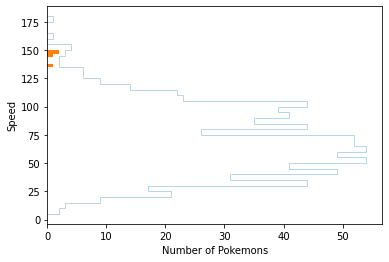

In [210]:
plt.hist(pokemon['Speed'], bins=35, alpha=0.3, histtype='step', orientation='horizontal')
plt.hist(mega_pokemons['Speed'], bins=5, orientation='horizontal')
plt.xlabel('Number of Pokemons')
plt.ylabel('Speed')
plt.show 

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

**Нулевая гипотеза**: и легендарные, и обычные покемоны в среднем по своим характеристикам одинаковы.
<br><b>Альтернативная гипотеза</b>: легендарные покемоны по сумме характеристик круче обычных.
<br><b>P-Value</b> установим = 0.05 (5%)

In [243]:
legendary = pokemon.loc[pokemon['Legendary'] == True].drop('Legendary', 1).reset_index(drop=True)
legendary['basic power'] = legendary['HP']+legendary['Attack']+legendary['Defense']
legendary['power multiples'] = legendary['HP']*legendary['Attack']*legendary['Defense']

ordinary = pokemon.loc[pokemon['Legendary'] == False].drop('Legendary', 1).reset_index(drop=True)
ordinary['basic power'] = ordinary['HP']+ordinary['Attack']+ordinary['Defense']
ordinary['power multiples'] = ordinary['HP']*ordinary['Attack']*ordinary['Defense']
ordinary.head()
# legendary.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,basic power,power multiples
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,134,87204


In [255]:
F, p = f_oneway(ordinary['basic power'], legendary['basic power']) # дисперсионный анализ
F, p
alpha = 0.05
difference = legendary['basic power'].mean()/ordinary['basic power'].mean()
if p > alpha:
    print('P-value больше порогового значения. Легендарные покемоны по сумме характеристик ничем не отличаются от обычных')
else: 
    print('P-value меньше порогового значения. Легендарные покемоны по сумме характеристик сильнее обычных в %.2f раза' % (difference))

P-value меньше порогового значения. Легендарные покемоны по сумме характеристик сильнее обычных в 1.44 раза


То же самое, только с помощью Манна-Уитни:

In [291]:
stat, p = mannwhitneyu(ordinary['basic power'], legendary['basic power'])
stat, p

(5576.0, 5.635221584292926e-25)

Повторяем все проделанное, но уже с показателями произведения 

In [295]:
F, p = f_oneway(ordinary['power multiples'], legendary['power multiples']) # дисперсионный анализ
F, p
alpha = 0.05
difference = legendary['power multiples'].mean()/ordinary['power multiples'].mean()
print('P-value = ', p)
if p > alpha:
    print('P-value больше порогового значения. Легендарные покемоны по сумме характеристик ничем не отличаются от обычных')
else: 
    print('P-value меньше порогового значения. Легендарные покемоны по сумме характеристик сильнее обычных в %.2f раза' % (difference))

P-value =  1.9926643088419018e-36
P-value меньше порогового значения. Легендарные покемоны по сумме характеристик сильнее обычных в 2.55 раза


In [277]:
pokemon.loc[pokemon['Legendary'] == False, 'Legendary'] = 'Ordinary'
pokemon.loc[pokemon['Legendary'] == True, 'Legendary'] = 'Legendary'
new_poks = pokemon.rename(columns={'Legendary': 'Status'})
new_poks['basic power'] = new_poks['HP']+new_poks['Attack']+new_poks['Defense']
new_poks['multy power'] = new_poks['HP']*new_poks['Attack']*new_poks['Defense']
new_poks.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Status,basic power,multy power
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,Ordinary,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,Ordinary,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,Ordinary,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,Ordinary,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,Ordinary,134,87204


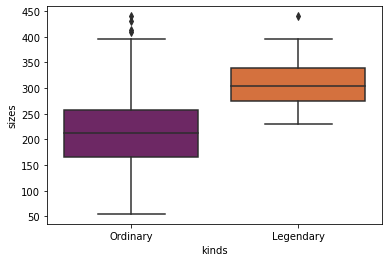

In [357]:
sizes = new_poks['basic power']
kinds = new_poks['Status']
diffs_md = pd.DataFrame()
diffs_md['sizes'] = sizes
diffs_md['kinds'] = kinds


sns.boxplot(x='kinds', y='sizes', data=diffs_md, palette="inferno")
plt.show()

То же самое, только визуально интереснее

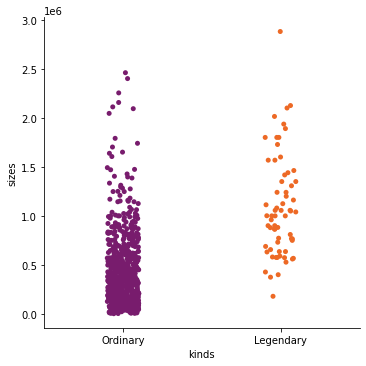

In [300]:
sizes = new_poks['multy power']
kinds = new_poks['Status']
diffs_md = pd.DataFrame()
diffs_md['sizes'] = sizes
diffs_md['kinds'] = kinds


sns.catplot(x='kinds', y='sizes', data=diffs_md, palette="inferno")
plt.show()

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [304]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

В силу опечаток в формулировке задачи, не совсем понял, что нужно сделать, поэтому сначала по уже пройденному варианту сравнил выборки:

In [343]:
best_defence_1 = new_poks.loc[new_poks['Class 1'].isin(['Rock', 'Ground','Steel','Ice'])].drop('Class 2', 1).reset_index(drop=True).rename(columns={'Class 1': 'Class'})
best_defence_2 = new_poks.loc[new_poks['Class 2'].isin(['Rock', 'Ground','Steel','Ice'])].drop('Class 1', 1).reset_index(drop=True).rename(columns={'Class 2': 'Class'})
best_defence = best_defence_1.merge(best_defence_2, how='outer')
best_defence_global

no_best_defense_1 = new_poks.loc[~new_poks['Class 1'].isin(['Rock', 'Ground','Steel','Ice'])].drop('Class 2', 1).reset_index(drop=True).rename(columns={'Class 1': 'Class'})
no_best_defense_2 = new_poks.loc[~new_poks['Class 2'].isin(['Rock', 'Ground','Steel','Ice'])].drop('Class 1', 1).reset_index(drop=True).rename(columns={'Class 2': 'Class'})
no_best_defense = no_best_defense_1.merge(no_best_defense_2, how='outer')
best_defence.head()
no_best_defense.head()

,pid,Name,Class,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Status,basic power,multy power
0,1,Bulbasaur,Grass,45,49,49,65,65,45,Ordinary,143,108045
1,2,Ivysaur,Grass,60,62,63,80,80,60,Ordinary,185,234360
2,3,Venusaur,Grass,80,82,83,100,100,80,Ordinary,245,544480
3,4,Mega Venusaur,Grass,80,100,123,122,120,80,Ordinary,303,984000
4,5,Charmander,Fire,39,52,43,60,50,65,Ordinary,134,87204


In [342]:
F, p = f_oneway(best_defence['Defense'], no_best_defense['Defense']) # дисперсионный анализ
F, p
alpha = 0.05
difference = best_defence['Defense'].mean()/no_best_defense['Defense'].mean()
print('P-value = ', p)
if p > alpha:
    print('P-value больше порогового значения. Покемоны по защите ничем не отличаются от обычных')
else: 
    print('P-value меньше порогового значения. Покемоны из группы "best_defence_class" по защите крепче обычных в %.1f раза' % (difference))

P-value =  1.8160916661207655e-34
P-value меньше порогового значения. Покемоны из группы "best_defence_class" по защите крепче обычных в 1.4 раза


А теперь просто сравним сами классы между собой

In [351]:
# best_defence.groupby('Class 1').mean().reset_index()
F, p = f_oneway(best_defence.loc[best_defence['Class'] == 'Rock']['Defense'], best_defence.loc[best_defence['Class'] == 'Ground']['Defense'], best_defence.loc[best_defence['Class'] == 'Steel']['Defense'], best_defence.loc[best_defence['Class'] == 'Ice']['Defense']) # дисперсионный анализ
F, p

(10.820124083047308, 1.231528168152447e-06)

Крайне низкий показатель P-value демонстрирует то, что  покемоны из группы "best_defence_class" между собой также имеют сильные различия. Однако...

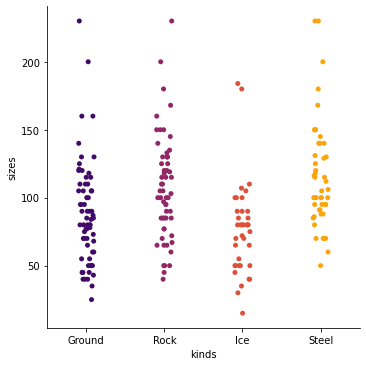

In [350]:
sizes = best_defence['Defense']
kinds = best_defence['Class']
diffs = pd.DataFrame()
diffs['sizes'] = sizes
diffs['kinds'] = kinds


sns.catplot(x='kinds', y='sizes', data=diffs, palette="inferno")
plt.show()

Наиболее сильное влияние на различие между классами в группе оказывает класс "Ice", максимально отличающийся от других 3-х классов. Однако, даже  при исключении этого класса из сравнения, значение p-value хоть и растет, но все равно остается значительно ниже порогового. 

In [354]:
F, p = f_oneway(best_defence.loc[best_defence['Class'] == 'Rock']['Defense'], best_defence.loc[best_defence['Class'] == 'Ground']['Defense'], best_defence.loc[best_defence['Class'] == 'Steel']['Defense']) # дисперсионный анализ
print('Значение P-Value = ', round(p*100, 3), '%' ) 

Значение P-Value =  0.026 %


In [356]:
best_defence.groupby('Class').mean()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,basic power,multy power
Class,,,,,,,,,
Ground,364.925373,75.582090,92.671642,87.701493,61.208955,64.835821,59.074627,255.955224,730333.134328
Ice,474.394737,78.631579,82.052632,76.657895,83.105263,79.421053,67.578947,237.342105,596236.763158
Rock,420.775862,66.017241,90.724138,107.086207,60.396552,73.810345,51.103448,263.827586,683541.258621
Steel,484.877551,64.959184,92.653061,116.612245,72.102041,83.163265,57.102041,274.224490,758263.632653
